In [1]:
import numpy as np
#%matplotlib inline
#%matplotlib ipympl ma
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn import linear_model
plt.rcParams["figure.figsize"] = (10,8)
import math
import seaborn as sns

In [2]:
df = pd.read_csv("Optimization datasheet.csv")
#df

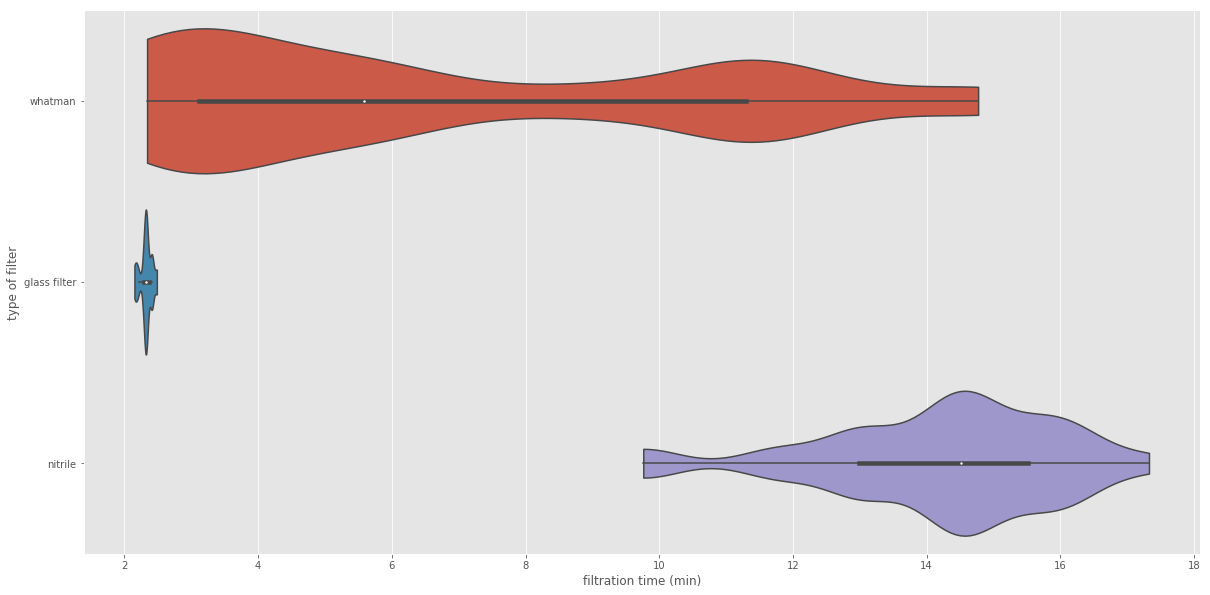

In [3]:
plt.rcParams["figure.figsize"] = (20,10)
dfv = df[df['type of filter']!= 'GF control'].copy()

sns.violinplot(x="filtration time (min)", y="type of filter", data=dfv, 
               scale="count",scale_hue=False,split=True,cut=0, bw=.29)

In [4]:
def zm(a):
    if a == 'Yes': return 'Zymo'
    return ''

In [5]:
dfv['Time (min)'] = dfv['filtration time (min)']*24 + dfv['extraction time']*96/9 + 120 #120 is the time for the qPCR


In [6]:
dc = {'QIagen':'p' , 'Dipstick':'x', 'NaOH':'o', 'beads':'^', 'Dipstick- direct pcr':'+', 'whatman': 'b', 'glass filter': 'green', 'nitrile': 'red'}

def markerMaker( ext):
    return  dc[ext]
def colormaker(fil):
    return dc[fil]
inv_dc = {v: k for k, v in dc.items()}

dfv['Method'] = dfv.apply(lambda row: row['type of filter'] +' ' +row['type of extraction']+' ' +zm(row.ZYMO) , axis=1) #
dfvshort = dfv[dfv.cq.notnull()].copy()
dfvshort['mark']= dfvshort.apply(lambda row: markerMaker(row['type of extraction']),axis =1)
dfvshort['color']= dfvshort['type of filter'].apply(colormaker)
dfvshort['size'] =dfvshort.ZYMO.apply(lambda x: [150 if x == 'Yes' else 50][0])



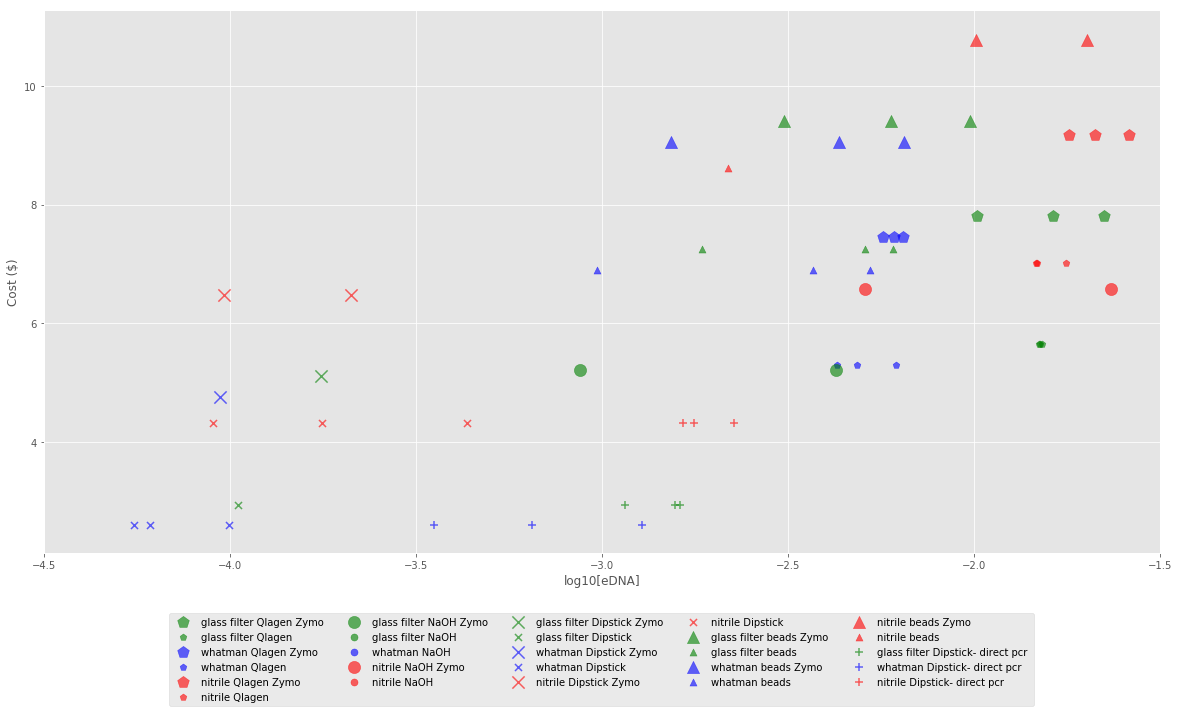

In [7]:
ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="log10[eDNA]",
                                                                                                    y="Cost ($)", color='red', 

                                                                                                       s = 0, marker = 'x' )
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="log10[eDNA]", y="Cost ($)", color=color, s= size, marker = marker, alpha = .6,ax=ax, label = a.iloc[0, 10]  )
ax.set_xlim([-4.5, -1.5])
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

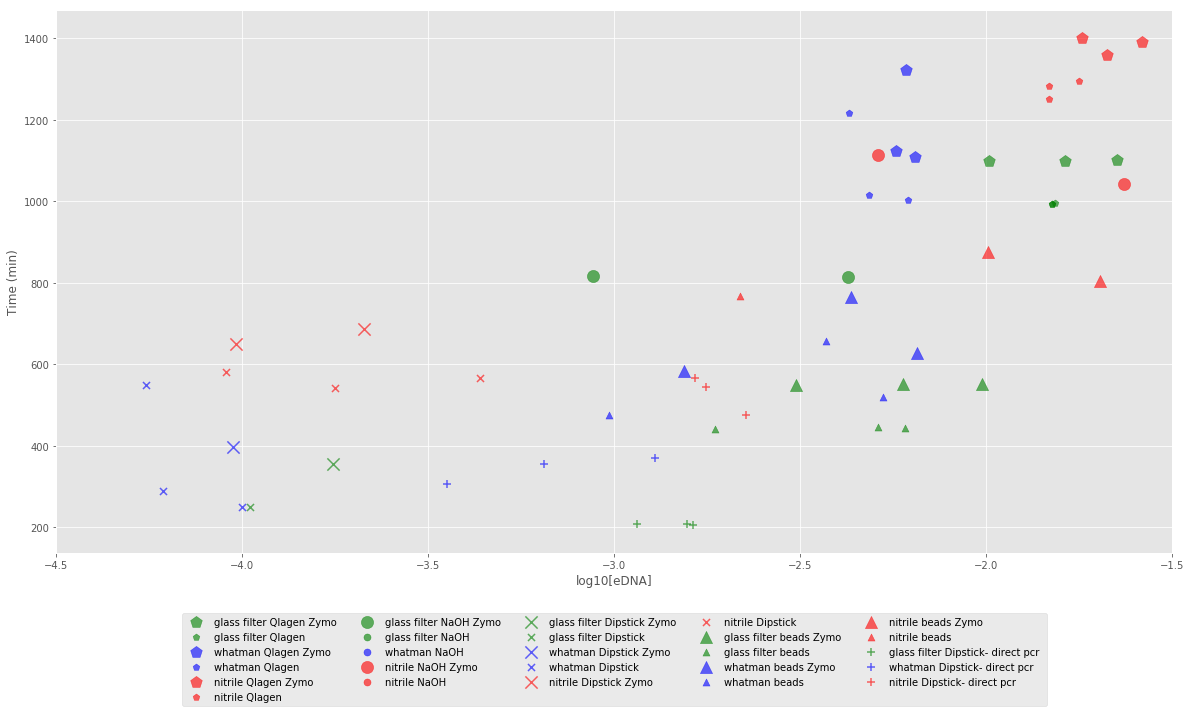

In [8]:
ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="log10[eDNA]",
                                                                                                    y="Time (min)", color='red', 
                                                                                                       s = 0, marker = 'x')
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="log10[eDNA]", y="Time (min)", color=color, s= size, marker = marker, alpha = .6,ax=ax, label =a.iloc[0, 10] )
ax.set_xlim([-4.5, -1.5])
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

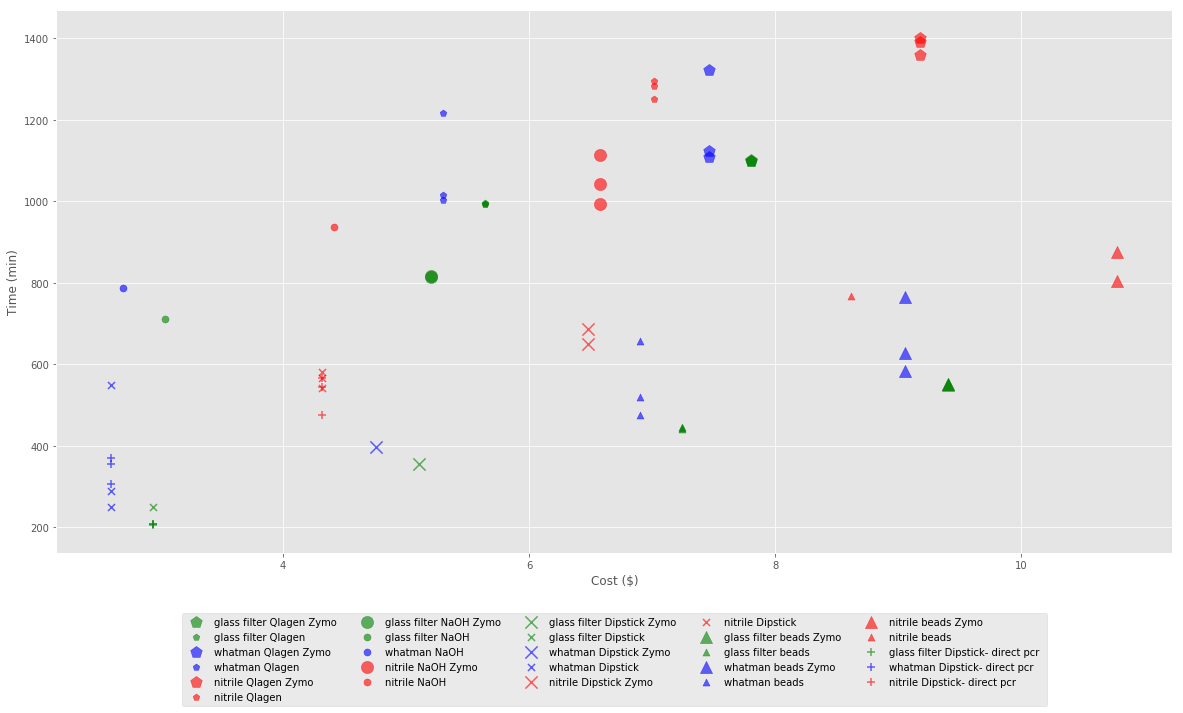

In [9]:

ax = dfvshort[(dfvshort['mark']=='x')&(dfvshort['color']=='red')&(dfvshort['size']==150)].plot.scatter(x="Cost ($)",
                                                                                                    y="Time (min)", color='red', 
                                                                                                       s = 0, marker = 'x' )
for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: a.plot.scatter(x="Cost ($)", y="Time (min)", color=color, s= size, marker = marker, alpha = .6,ax=ax , label =a.iloc[0, 10] )
#ax.set_xlim([-4.5, -1.5])
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

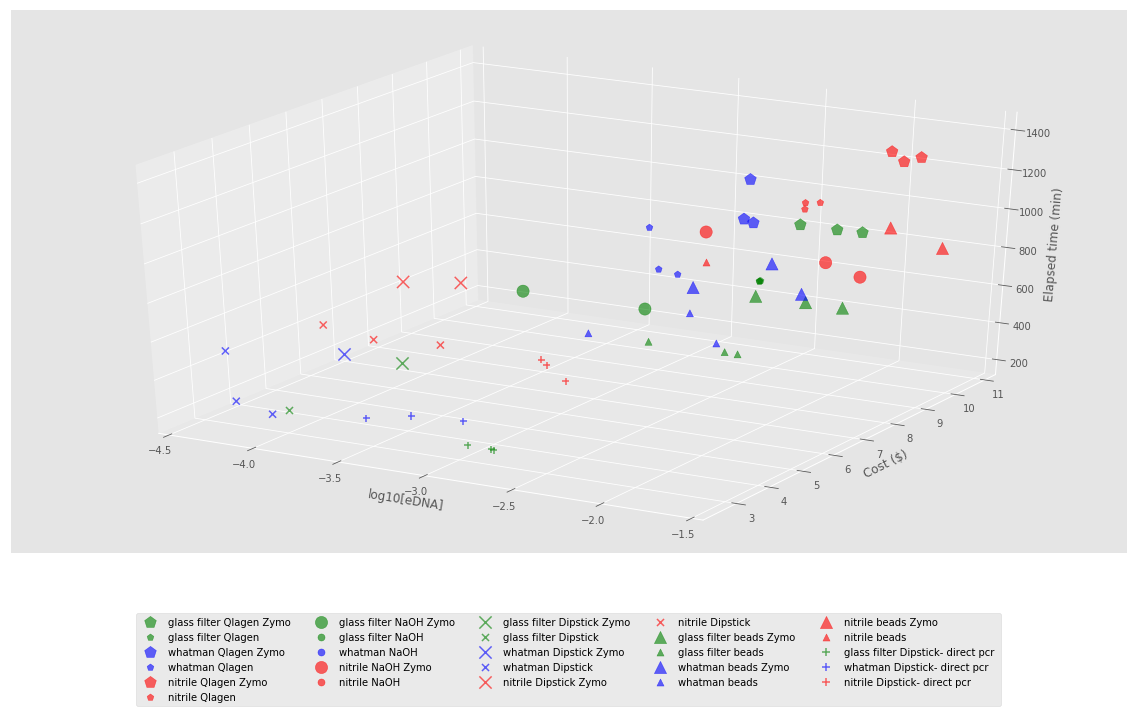

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfvshort[(dfvshort['mark']==marker)&(dfvshort['color']==color)&(dfvshort['size']==size)]
            if a.empty != 1: ax.scatter(xs=list(a["log10[eDNA]"]), ys=list(a["Cost ($)"]), zs=list(a['Time (min)']) ,
                                        color=color, s= size, marker = marker, alpha = .6, label =a.iloc[0, 10] )
ax.set_xlim([-4.5, -1.5])
plt.xlabel('log10[eDNA]')
plt.ylabel('Cost ($)')
ax.set_zlabel('Elapsed time (min)')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

In [11]:
#sns.violinplot(y="log10[eDNA]", x="Method", data=dfv[dfv.ZYMO != 'Yes'], hue ='type of extraction',#split = True,
#               scale="count",scale_hue=False,cut=0, bw=.29)

In [12]:
def pretty (label, values, name, rota = -.25, df = dfv, dna = True, l = .7):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    pal = sns.cubehelix_palette(30, rot=rota, light=l)
    g = sns.FacetGrid(df, row=label,hue=label, aspect=12, palette=pal,  xlim=(-4.5,-1.5))#
    g.set(xlim=[-4.5, -1.5])


    # Draw the densities in a few steps
    g.map(sns.kdeplot, values, clip_on=False, shade=True, alpha=.8, lw=1.5, bw=.2)
    g.map(sns.kdeplot, values, clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        if dna: ax.set_xlim(-9,-1)


    g.map(label, values)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True) 
    plt.savefig(name)

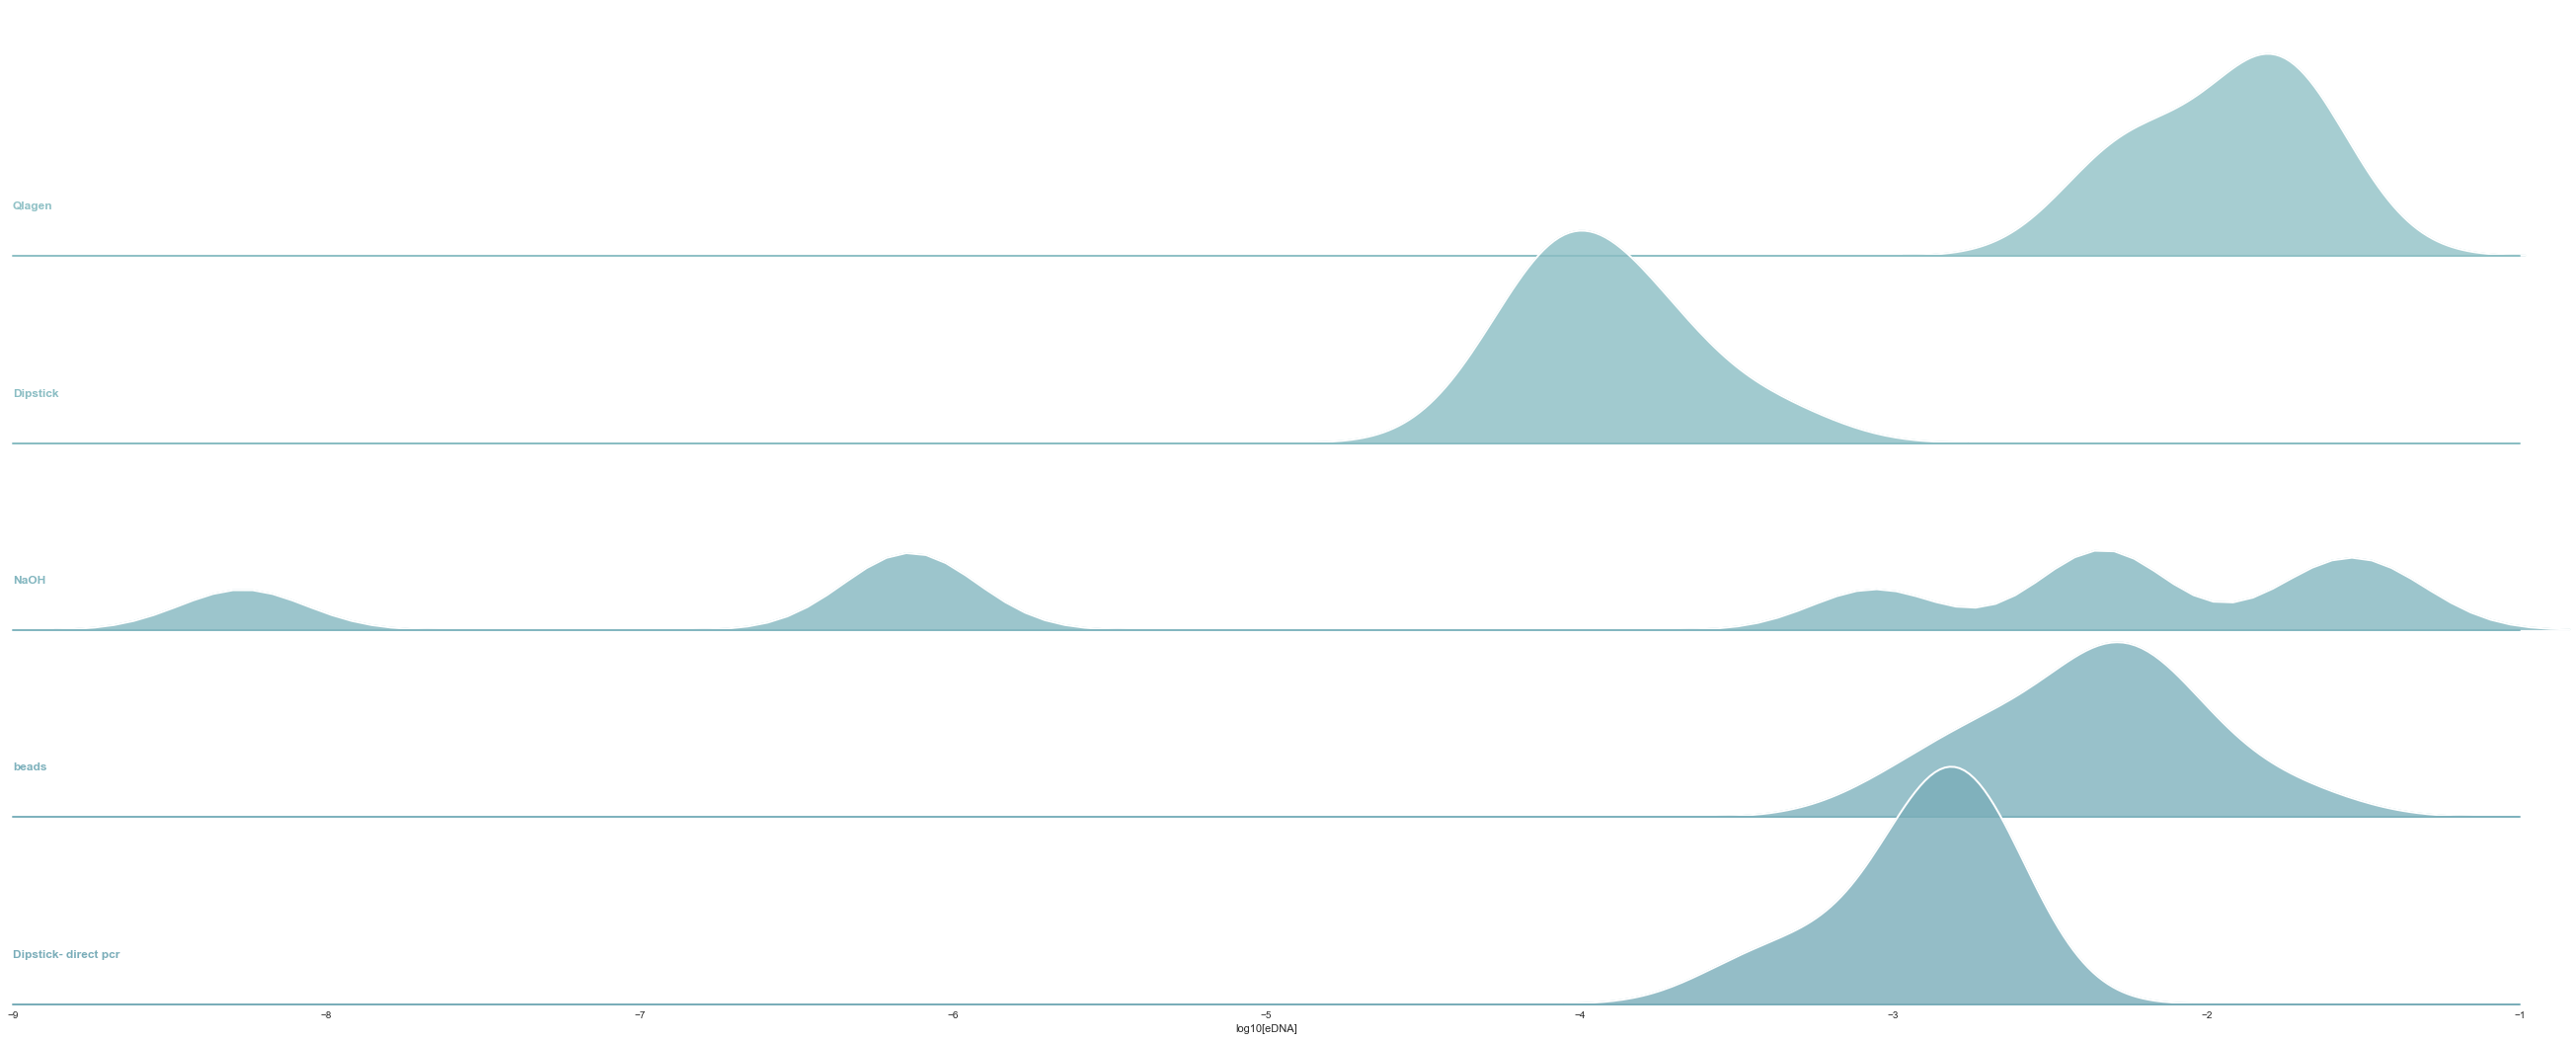

In [13]:
pretty('type of extraction', 'log10[eDNA]', 'method efficiency test')

In [14]:
#pretty("ZYMO",'log10[eDNA]', 'zymo effects')

In [15]:
#pretty('type of extraction', 'log10[eDNA]', 'whatmanfull', df = dfv[dfv['type of filter']=='whatman'])
#pretty('type of extraction', 'log10[eDNA]', 'glassfull', df = dfv[dfv['type of filter']=='glass filter'], rota = .75)
#pretty('type of extraction', 'log10[eDNA]', 'mcifull', df = dfv[dfv['type of filter']=='nitrile'], rota = .5)

In [16]:
#pretty('type of extraction', 'log10[eDNA]', 'whatmanZ', df = dfv[(dfv['type of filter']=='whatman') & (dfv['ZYMO']=='Yes')], rota = 1)
#pretty('type of extraction', 'log10[eDNA]', 'glassZ', df = dfv[(dfv['type of filter']=='glass filter')& (dfv['ZYMO']=='Yes')], rota = .5)
#pretty('type of extraction', 'log10[eDNA]', 'mciZ', df = dfv[(dfv['type of filter']=='nitrile')& (dfv['ZYMO']=='Yes')], rota = .24)
#pretty('type of extraction', 'log10[eDNA]', 'whatman', df = dfv[(dfv['type of filter']=='whatman') & (dfv['ZYMO']=='No')], rota = 1, l = .88)
#pretty('type of extraction', 'log10[eDNA]', 'glass', df = dfv[(dfv['type of filter']=='glass filter')& (dfv['ZYMO']=='No')], rota = .5, l=.88)
#pretty('type of extraction', 'log10[eDNA]', 'mci', df = dfv[(dfv['type of filter']=='nitrile')& (dfv['ZYMO']=='No')], rota = .24, l=.888)

# estimating DNA retrieval percentage per method and filter 

## equation (theory 1 inhibitor effects bind to DNA)
$$ eDNA_{Retrived} = eDNA_{Sample}*FilterLoss*ExtractionLoss*ZymoLoss  - inhibitorCarryover(filter)* inhibitorCarryover(extraction)*Bolean(ZYMO)$$

## equation (theory 2 inhibitor effects amplification) 
$$ \frac{eDNA_{Retrived}}{eDNA_{Sample}} = FilterLoss*ExtractionLoss*ZymoLoss  - inhibitorCarryover(filter)* inhibitorCarryover(extraction)*Bolean(ZYMO)$$

### testing without inhibitor test first: 
#### for simplification will use that $eDNA_{Sample} =1$

In [17]:
import lmfit as lm

In [18]:
dfv['log10[eDNA]'] = dfv['log10[eDNA]'].apply(lambda x: [-10 if np.isnan(x) else x][0] )
dfv['eDNA'] = dfv['log10[eDNA]'].apply(lambda x: 10**x)
dfv['boolZymo'] = dfv['ZYMO'].apply(lambda x: [.01 if x == 'No' else 0][0])
#dfv


In [19]:
par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .1, True, 0.0, 1., None, None),
                 ('MCIR', .1, True, .0, 1., None, None),
                ('QIagenR', .3, False, .0, 1., None, None),
                ('BeadsR', .3, True, .0, 1., None, None),
                ('DipstickR', .3, True, .0, 1., None, None),
                ('NaOHR', .3, True, .0, 1., None, None),
                ('dDipstickR', .3, True, .0, 1., None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .5, True, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                #('QIagenI', .5, True, .0, 1., None, None),
                #('BeadsI', .5, True, .0, 1., None, None),
                #('DipstickI', .5, True, .0, 1., None, None),
                #('NaOHI', .5, True, .0, 1., None, None),
                #('dDipstickI', .5, True, .0, 1., None, None))
                

In [20]:
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass filter': p['glassR'], 'nitrile': p['MCIR']}
    #Ifil = {'whatman': p['whatmanI'], 'glass filter': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'beads': p['BeadsR'], 'Dipstick- direct pcr': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    #Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:row['eDNA']- Rfil[row['type of filter']]*Rext[row['type of extraction']], axis= 1)) # + row['boolZymo']*Ifil[row['type of filter']]*Iext[row['type of extraction']]

In [21]:
%%time
sum(residual(par))

CPU times: user 7.41 ms, sys: 98 µs, total: 7.5 ms
Wall time: 7.69 ms


-2.0194338039531634

In [22]:
mini = lm.Minimizer(residual, par)
result = mini.minimize()

In [23]:
print(lm.fit_report(result.params))

[[Variables]]
    whatmanR:    0.01837061 +/- 0.00645403 (35.13%) (init = 0.1)
    glassR:      0.04786422 +/- 0.00666546 (13.93%) (init = 0.1)
    MCIR:        0.06583486 +/- 0.00688009 (10.45%) (init = 0.1)
    QIagenR:     0.3 (fixed)
    BeadsR:      0.09739406 +/- 0.02700924 (27.73%) (init = 0.3)
    DipstickR:   0.00204958 +/- 0.02561636 (1249.83%) (init = 0.3)
    NaOHR:       0.10785494 +/- 0.02730066 (25.31%) (init = 0.3)
    dDipstickR:  0.02985359 +/- 0.03642054 (122.00%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(MCIR, NaOHR)    = -0.277
    C(MCIR, BeadsR)   = -0.253
    C(glassR, NaOHR)  = -0.208
    C(glassR, BeadsR) = -0.190
    C(BeadsR, NaOHR)  =  0.104


# testing with inhibitors (hypotesis 2)

In [24]:
par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .2, True, 0.0, 1., None, None),
                 ('MCIR', .3, True, .0, 1., None, None),
                ('QIagenR', .8, False, .0, 1., None, None),
                ('BeadsR', .1, True, .0, 1., None, None),
                ('DipstickR', .1, True, .0, 1., None, None),
                ('NaOHR', .1, True, .0, 1., None, None),
                ('dDipstickR', .1, True, .0, 1., None, None),
                ("a", .1, True, 0.1, 1, None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .794, False, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                #('QIagenI', .3, False, .0, 1., None, None),
                #('BeadsI', .5, True, .0, 1., None, None),
                #('DipstickI', .5, True, .0, 1., None, None),
                #('NaOHI', .5, True, .0, 1., None, None),
                #('dDipstickI', .5, True, .0, 1., None, None))
                

    
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass filter': p['glassR'], 'nitrile': p['MCIR']}
    #Ifil = {'whatman': p['whatmanI'], 'glass filter': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'beads': p['BeadsR'], 'Dipstick- direct pcr': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    #Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:row['eDNA']- 
                          Rfil[row['type of filter']]*Rext[row['type of extraction']]
                          - row['boolZymo']*p['a'], axis= 1)) 
                          # Ifil[row['type of filter']]*Iext[row['type of extraction']]

In [25]:
mini = lm.Minimizer(residual, par)
result = mini.minimize( )

In [26]:
print(lm.fit_report(result.params))


[[Variables]]
    whatmanR:    0.00944394 +/- 0.00324284 (34.34%) (init = 0.1)
    glassR:      0.01997218 +/- 0.00326657 (16.36%) (init = 0.2)
    MCIR:        0.02634428 +/- 0.00332422 (12.62%) (init = 0.3)
    QIagenR:     0.8 (fixed)
    BeadsR:      0.30024854 +/- 0.08556139 (28.50%) (init = 0.1)
    DipstickR:   0.08287816 +/- 0.08397396 (101.32%) (init = 0.1)
    NaOHR:       0.31161050 +/- 0.08581005 (27.54%) (init = 0.1)
    dDipstickR:  0.21362666 +/- 0.12696271 (59.43%) (init = 0.1)
    a:           0.26744086 +/- 0.16408469 (61.35%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(dDipstickR, a)         = -0.477
    C(whatmanR, a)           = -0.389
    C(DipstickR, a)          = -0.373
    C(glassR, a)             = -0.297
    C(BeadsR, a)             = -0.257
    C(NaOHR, a)              = -0.250
    C(MCIR, a)               = -0.246
    C(MCIR, NaOHR)           = -0.210
    C(MCIR, BeadsR)          = -0.199
    C(DipstickR, dDipstickR) =  0.194
 

In [27]:
par = lm.Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
par.add_many(('whatmanR', .1, True, .0, 1., None, None),
                 ('glassR', .2, True, 0.0, 1., None, None),
                 ('MCIR', .3, True, .0, 1., None, None),
                ('QIagenR', .3, False, .0, 1., None, None),
                ('BeadsR', .097, True, .0, 1., None, None),
                ('DipstickR', .002, True, .0, 1., None, None),
                ('NaOHR', .107, True, .0, 1., None, None),
                ('dDipstickR', .0298, True, .0, 1., None, None),
                #("a", 1, True, 0, 1, None, None))
                #('whatmanI', .5, True, .0, 1., None, None),
                 #('glassI', .794, False, 0.0, 1., None, None),
                 #('MCII', .5, True, .0, 1., None, None),
                ('QIagenI', .3, True, .0, 1., None, None),
                ('BeadsI', .5, True, .0, 1., None, None),
                ('DipstickI', .5, True, .0, 1., None, None),
                ('NaOHI', .5, True, .0, 1., None, None),
                ('dDipstickI', .5, True, .0, 1., None, None))
                
from math import log
    
def residual(p):
    Rfil = {'whatman': p['whatmanR'], 'glass filter': p['glassR'], 'nitrile': p['MCIR']}
    #Ifil = {'whatman': p['whatmanI'], 'glass filter': p['glassI'], 'nitrile': p['MCII']}
    Rext = {'QIagen': p['QIagenR'], 'NaOH': p['NaOHR'], 'beads': p['BeadsR'], 'Dipstick- direct pcr': p['dDipstickR'], 'Dipstick': p['DipstickR']}
    Iext = {'QIagen': p['QIagenI'], 'NaOH': p['NaOHI'], 'beads': p['BeadsI'], 'Dipstick- direct pcr': p['dDipstickI'], 'Dipstick': p['DipstickI']}
    return list(dfv.apply(lambda row:log(row['eDNA'])- 
                          log(Rfil[row['type of filter']]*Rext[row['type of extraction']])
                          - row['boolZymo']*Iext[row['type of extraction']], axis= 1)) 
                          # Ifil[row['type of filter']]*Iext[row['type of extraction']]

#mini = lm.Minimizer(residual, par)
#result = mini.minimize('leastsq')

In [28]:
#print(lm.fit_report(result.params))

# testing with pyMC3

In [29]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.5


/home/thiagoms/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
basic_model = pm.Model()

RecFilter = [1,1,1]       #order: whatman | Glass    | MCI
RecExtrac = [1,1,1,1,1]   #order: QIagen  | Dipstick | NaOH | beads | dDip
alpha = .01
Y = list(dfv['eDNA'])
   
def formulae(fil, ext, a, types ):
    Rfil = {'whatman': fil[0], 'glass filter': fil[1], 'nitrile': fil[3]}
    Rext = {'QIagen': ext[0], 'Dipstick': ext[1], 'NaOH': ext[2], 'beads': ext[3], 'Dipstick- direct pcr': ext[4]}
    return list(dfv.apply(lambda row: Rfil[row['type of filter']]*Rext[row['type of extraction']] - row['boolZymo']*a , axis= 1)) 


#with basic_model:

    # Priors for unknown model parameters
#    RecFilter = pm.Normal('Filter Recovery'     , mu=.5, sd=10, shape = 3)    #order: whatman | Glass    | MCI
#    RecExtrac = pm.Normal('Extraction Recovery' , mu=.5, sd=10, shape = 5)      #order: QIagen  | Dipstick | NaOH | beads | dDip
#    alpha     = pm.Normal('alpha'               , mu=.1, sd=10)
#    sigma = pm.HalfNormal('sigma', sd=1)

    # Expected value of outcome
#    mu = formulae(RecFilter, RecExtrac, alpha)
    
    # Likelihood (sampling distribution) of observations
#    Y_obs = pm.Normal('Y_obs', mu=mu, sd=sigma, observed=Y)

# testing RandomForestRegressor

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
leF = preprocessing.LabelEncoder()
leE = preprocessing.LabelEncoder()
leZ = preprocessing.LabelEncoder()

In [32]:
#getting predictor data
filterType     = list(dfv['type of filter'])
extractionType = list(dfv['type of extraction'])
ifZymo         = list(dfv.ZYMO)
#geting output data
Output         = list(dfv.eDNA)

In [33]:
#encoding classes
leF.fit(filterType)
leE.fit(extractionType)
leZ.fit(ifZymo)
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))


In [34]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(X, Output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
print(regr.feature_importances_)

[0.25610937 0.67578189 0.06810873]


## according to this classifier the most important predictor to DNA recovery is the extraction method, followed by the filter type and in this case zymo wasn't that important: maybe there weren't many inhibitors in the sampled location

In [36]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import confusion_matrix
dfshuffle = shuffle(dfv)

In [37]:
#training data

filterType     = list(dfv['type of filter'])[:60]
extractionType = list(dfv['type of extraction'])[:60]
ifZymo         = list(dfv.ZYMO)[:60]
#geting output data
Output         = list(dfv.eDNA)[:60]

In [38]:
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))

In [39]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
cv_results = cross_validate(regr, X, Output, return_train_score=False, scoring=('r2', 'neg_mean_squared_error'))

In [40]:
print(sorted(cv_results.keys()))
print(cv_results['test_neg_mean_squared_error']) 
print(cv_results['test_r2'])

['fit_time', 'score_time', 'test_neg_mean_squared_error', 'test_r2']
[-1.90357154e-06 -5.58968623e-05 -6.10859628e-06]
[ 0.92963926 -0.87004383  0.82405764]


# ploting Random forest

In [41]:
#%matplotlib inline
%matplotlib ipympl 
#%matplotlib widget

#getting predictor data
filterType     = list(dfv['type of filter'])
extractionType = list(dfv['type of extraction'])
ifZymo         = list(dfv.ZYMO)
#geting output data
Output         = list(dfv.eDNA)
#encoding classes
leF.fit(filterType)
leE.fit(extractionType)
leZ.fit(ifZymo)
EncodedFilter      = leF.transform(filterType)
EncodedExtraction  = leE.transform(extractionType)
EncodedZymo        = leZ.transform(ifZymo)
#use le.inverse_transform(y) to go back
X  = list(zip(EncodedFilter, EncodedExtraction, EncodedZymo))
regr = RandomForestRegressor(max_depth=30, random_state=0)
regr.fit(X, Output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [42]:
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from math import log10
qw, qe , qr =get_test_data(.05)

In [43]:
Xt = range(3)
Yt = range(5)
Xt, Yt = np.meshgrid(Xt, Yt)
zyes = np.zeros([5,3])
for i in range(5):
    for j in range(3):
        zyes[i,j] = log10(regr.predict([(j,i,1)])[0])
zno = np.zeros([5,3])
for i in range(5):
    for j in range(3):
        zno[i,j] = log10(regr.predict([(j,i,0)])[0])

In [44]:
plt.rcParams["figure.figsize"] = (10,8)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



dfv['mark']= dfv.apply(lambda row: markerMaker(row['type of extraction']),axis =1)
dfv['color']= dfv['type of filter'].apply(colormaker)
dfv['size'] =dfv.ZYMO.apply(lambda x: [150 if x == 'Yes' else 50][0])

for marker in ['p', 'o', 'x', '^', '+']:
    for color in ['green', 'b', 'red']:
        for size in [150, 50]:
            a = dfv[(dfv['mark']==marker)&(dfv['color']==color)&(dfv['size']==size)]
            if a.empty != 1: ax.scatter(ys=list(a["log10[eDNA]"]), zs=leF.transform(list(a["type of filter"])), xs=leE.transform(list(a['type of extraction'])) ,
                                        color=color, s= size, marker = marker, alpha = .6, label = a.iloc[0,10]) #
ax.set_ylim([-10.1, -1.5]) 
plt.ylabel('log10[eDNA]')
plt.xlabel('extraction method')
ax.set_zlabel('filter type')
plt.xticks(np.arange(5), ('Dipstick', 'dDipstick', 'NaOH', 'QIagen', 'Beads'))
ax.set_zticks(np.arange(3))
ax.set_zticklabels(('Glass filter', 'MCI', 'Whatman'))
#dc = {'QIagen':'p' , 'Dipstick':'x', 'NaOH':'o', 'beads':'^', 'Dipstick- direct pcr':'+', 'whatman': 'b', 'glass filter': 'green', 'nitrile': 'red'}

ax.plot_wireframe(Yt, zyes, Xt, color = 'black', label = 'with Zymo')
ax.plot_wireframe(Yt, zno,Xt, color = 'gray', label = 'without Zymo')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=5)

FigureCanvasNbAgg()

In [45]:
dfv.iloc[0, 10]

'whatman QIagen '